Input: data file in long format. Averages em_fraction for each site along all available dates

Run after calcVegAreaFromPts.ipynb

TODO:
* Remove outliers? Or use quantiles instead of min/max?

In [1]:
import pandas as pd

In [2]:
csv_in='/mnt/f/PAD2019/Chemistry/em_fraction_csv/ABoVE_Lakes_all_em_fraction.csv'
csv_out_pth='/mnt/f/PAD2019/Chemistry/em_fraction_csv/ABoVE_Lakes_all_em_fraction_average.csv'
csv=pd.read_csv(csv_in)
del csv['index_right']
del csv['label']
del csv['Unnamed: 0']

csv.head()

,site,date,Latitude_dd,Longitude_dd,em_fractio,area_px_m2,perimeter_,scene_id,scene_name
0,Roche Pond,180821,58.8330,-111.2830,NaN,NaN,NaN,16008,bakerc_16008_18047_005_180821_L090_CX_02
1,Dore Lake,180821,58.7904,-111.0500,NaN,NaN,NaN,16008,bakerc_16008_18047_005_180821_L090_CX_02
2,Little Lake,180821,58.7364,-111.1220,NaN,NaN,NaN,16008,bakerc_16008_18047_005_180821_L090_CX_02
3,Roberts Cabin Pond,180821,58.8057,-111.2430,NaN,NaN,NaN,16008,bakerc_16008_18047_005_180821_L090_CX_02
4,Flett Lake,180821,58.9539,-111.0783,NaN,NaN,NaN,16008,bakerc_16008_18047_005_180821_L090_CX_02


In [3]:
# remove duplicates
len_before=len(csv)
# csv.drop_duplicates(['site', 'area_px_m2', 'perimeter_'], inplace=True) # 'site', 'date','scene_id'
len_after=len(csv)
print(f'Removed {len_before-len_after} duplicates')

Removed 0 duplicates


In [4]:
#example view
csv[csv.site=='Balloon Lake']

,site,date,Latitude_dd,Longitude_dd,em_fractio,area_px_m2,perimeter_,scene_id,scene_name
14,Balloon Lake,180821,58.8775,-111.2264,NaN,NaN,NaN,16008,bakerc_16008_18047_005_180821_L090_CX_02
60,Balloon Lake,190904,58.8775,-111.2264,NaN,NaN,NaN,16008,bakerc_16008_19059_012_190904_L090_CX_01
106,Balloon Lake,170916,58.8775,-111.2264,NaN,NaN,NaN,4707,ftyuko_04707_17098_007_170916_L090_CX_01E
152,Balloon Lake,170916,58.8775,-111.2264,NaN,NaN,NaN,4707,ftyuko_04707_17098_007_170916_L090_CX_01
198,Balloon Lake,180827,58.8775,-111.2264,NaN,NaN,NaN,4707,ftyuko_04707_18051_008_180827_L090_CX_01
245,Balloon Lake,170908,58.8775,-111.2264,0.134908,1.501206e+05,5127.838828,36000,padelE_36000_17093_007_170908_L090_CX_01
291,Balloon Lake,190904,58.8775,-111.2264,NaN,NaN,NaN,36000,padelE_36000_19059_003_190904_L090_CX_01
337,Balloon Lake,170613,58.8775,-111.2264,0.747349,9.735220e+05,23075.719190,18035,PADELT_18035_17062_004_170613_L090_CX_01
384,Balloon Lake,170613,58.8775,-111.2264,0.428388,2.459455e+05,5433.376549,36000,PADELT_36000_17062_003_170613_L090_CX_01
430,Balloon Lake,170908,58.8775,-111.2264,0.676954,1.035298e+06,48508.567721,18035,padelW_18035_17093_008_170908_L090_CX_01


In [5]:
# show number of obs
csv_count=csv[csv['em_fractio']>0][['em_fractio', 'site']].groupby('site').count()
csv_count

,em_fractio
site,
12mile,3
9Mile,5
Balloon Lake,4
Balloon Lake #1,6
Blanche,6
Canvasback,5
Chillowes Lake,6
Daring Lake,2
Egg Lake,6


In [6]:
# show means
csv.groupby('site').mean()

,date,Latitude_dd,Longitude_dd,em_fractio,area_px_m2,perimeter_,scene_id
site,,,,,,,
12mile,174134.380952,66.4497,-145.5460,0.255467,3.691655e+06,4.861574e+04,18557.904762
9Mile,174134.380952,66.1858,-146.6609,0.036683,3.201417e+06,9.977065e+03,18557.904762
Balloon Lake,174134.380952,58.8775,-111.2264,0.496900,6.012215e+05,2.053638e+04,18557.904762
Balloon Lake #1,174134.380952,58.8786,-111.2527,0.169711,8.455886e+05,1.793781e+04,18557.904762
Big Beaver,174134.380952,58.7615,-111.0733,NaN,NaN,NaN,18557.904762
Blanche,174134.380952,58.3922,-111.2790,0.341966,1.890766e+07,4.134032e+05,18557.904762
Canvasback,174134.380952,66.3833,-146.3553,0.302260,1.307957e+07,6.602440e+04,18557.904762
Chillowes Lake,174134.380952,58.8143,-111.3587,0.599147,4.887572e+05,1.267829e+04,18557.904762
Daring Lake,174134.380952,64.8651,-111.5929,0.000746,2.767037e+08,2.386447e+06,18557.904762


In [7]:
# show other stats
dir(csv.groupby('site'))
csv.groupby('site').describe()
# csv[['site', 'em_fractio']].groupby('site').describe() # view all stats
csv_range=csv[['site', 'em_fractio']].groupby('site').describe().em_fractio['max'] - csv[['site', 'em_fractio']].groupby('site').describe().em_fractio['min'] # view just diff
csv_range

site
12mile                  0.041715
9Mile                   0.018281
Balloon Lake            0.612441
Balloon Lake #1         0.407461
Big Beaver                   NaN
Blanche                 0.446310
Canvasback              0.424778
Chillowes Lake          0.449364
Daring Lake             0.000203
Daring Lake 4           0.000000
Dore Lake                    NaN
Egg Lake                0.379438
Emberras Pond           0.075119
Flett Lake                   NaN
Green Star Lake         0.965739
Horseshoe               0.074721
Lake 10                      NaN
Lake Kakawi             0.000203
Lake M2                      NaN
Limon Lake              0.471145
Little Beaver                NaN
Little Lake                  NaN
PAD3                    0.399880
Rat Lake                0.770898
Roberts Cabin Pond      0.219478
Roche Pond              0.284121
Swan's Fly Farm Pond    0.666564
Third Lake                   NaN
abraham                 0.002254
boot                    0.002405
buddy

In [8]:
csv_out=csv.groupby('site').mean().copy()
csv_out['em_fraction']=csv.groupby('site').mean().em_fractio
del csv_out['date'], csv_out['em_fractio'] #,csv_out['scene_name'], csv_out['scene_id']
del csv_out['scene_id']


In [9]:
csv_out.rename({'perimeter_':'perimeter_px_m2'}, axis='columns', errors='raise', inplace=True)
# csv_out.head()

In [10]:
# add uncertainty
csv_out['em_frac_range']=csv_range
csv_out['num_observations']=csv_count.astype(int)
csv_out

,Latitude_dd,Longitude_dd,area_px_m2,perimeter_px_m2,em_fraction,em_frac_range,num_observations
site,,,,,,,
12mile,66.4497,-145.5460,3.691655e+06,4.861574e+04,0.255467,0.041715,3.0
9Mile,66.1858,-146.6609,3.201417e+06,9.977065e+03,0.036683,0.018281,5.0
Balloon Lake,58.8775,-111.2264,6.012215e+05,2.053638e+04,0.496900,0.612441,4.0
Balloon Lake #1,58.8786,-111.2527,8.455886e+05,1.793781e+04,0.169711,0.407461,6.0
Big Beaver,58.7615,-111.0733,NaN,NaN,NaN,NaN,NaN
Blanche,58.3922,-111.2790,1.890766e+07,4.134032e+05,0.341966,0.446310,6.0
Canvasback,66.3833,-146.3553,1.307957e+07,6.602440e+04,0.302260,0.424778,5.0
Chillowes Lake,58.8143,-111.3587,4.887572e+05,1.267829e+04,0.599147,0.449364,6.0
Daring Lake,64.8651,-111.5929,2.767037e+08,2.386447e+06,0.000746,0.000203,2.0


In [11]:
csv_out.to_csv(csv_out_pth)

# Visualization

In [13]:
csv_out.mean()

Latitude_dd         6.278725e+01
Longitude_dd       -1.274519e+02
area_px_m2          1.124066e+08
perimeter_px_m2     4.714810e+05
em_fraction         2.001493e-01
em_frac_range       2.447450e-01
num_observations    4.181818e+00
dtype: float64

In [16]:
csv.groupby('site').mean()

,date,Latitude_dd,Longitude_dd,em_fractio,area_px_m2,perimeter_,scene_id
site,,,,,,,
12mile,174134.380952,66.4497,-145.5460,0.255467,3.691655e+06,4.861574e+04,18557.904762
9Mile,174134.380952,66.1858,-146.6609,0.036683,3.201417e+06,9.977065e+03,18557.904762
Balloon Lake,174134.380952,58.8775,-111.2264,0.496900,6.012215e+05,2.053638e+04,18557.904762
Balloon Lake #1,174134.380952,58.8786,-111.2527,0.169711,8.455886e+05,1.793781e+04,18557.904762
Big Beaver,174134.380952,58.7615,-111.0733,NaN,NaN,NaN,18557.904762
Blanche,174134.380952,58.3922,-111.2790,0.341966,1.890766e+07,4.134032e+05,18557.904762
Canvasback,174134.380952,66.3833,-146.3553,0.302260,1.307957e+07,6.602440e+04,18557.904762
Chillowes Lake,174134.380952,58.8143,-111.3587,0.599147,4.887572e+05,1.267829e+04,18557.904762
Daring Lake,174134.380952,64.8651,-111.5929,0.000746,2.767037e+08,2.386447e+06,18557.904762


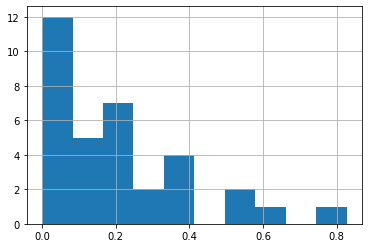

In [17]:
csv_out.em_fraction.hist()